In [1]:
#importing Required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the given CSV files
companies=pd.read_csv("companies.csv",encoding="latin1")
rounds2=pd.read_csv("rounds2.csv",encoding="latin1")

# Checkpoint1: Data Cleaning 1

In [3]:
#unique companies present in rounds2
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
rounds2.company_permalink.drop_duplicates().count()

66370

In [4]:
rounds2['company_permalink'].describe()

count                       114949
unique                       66370
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [5]:
#unique companies present in companies
companies['permalink']=companies['permalink'].str.lower()
companies['permalink'].drop_duplicates().count()

66368

In [6]:
#Are there any companies in the rounds2 file which are not present in companies
rounds=rounds2[-(rounds2.company_permalink.isin(companies.permalink))]

rounds

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


#### As we can see above, rounds2 file has few companies, that are not present in companies

In [8]:
## Merging Companies and rounds2 dataframes into master_frame
master_frame=rounds2.merge(companies,left_on="company_permalink",right_on="permalink",how="left").drop('permalink',axis=1)

In [9]:
master_frame.shape

(114949, 15)

In [10]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### DataCleaning

In [11]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [12]:
#calculate percentage of missing values column wise
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [13]:
#Removing Null values for raised_amount_usd column as it is holding 17.39%
master_frame=master_frame[-master_frame.raised_amount_usd.isnull()]

In [14]:
#Verifying if null values are removed from raised_amount_usd
master_frame.raised_amount_usd.isnull().sum()

0

In [15]:
#Removing Null values for country_code column
master_frame=master_frame[-master_frame.country_code.isnull()]

In [16]:
#Verifying if null values are removed from country_code
master_frame.country_code.isnull().sum()

0

In [17]:
#Removing Null values for category_list column
master_frame=master_frame[-master_frame.category_list.isnull()]

In [18]:
#Verifying if null values are removed from category_list
master_frame.category_list.isnull().sum()

0

In [19]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.75
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                3.67
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.96
region                      1.34
city                        1.33
founded_at                 15.10
dtype: float64

#### Leaving Other Columns as it is since they are not required for the Analysis!

# Checkpoint2: Funding Type Analysis

In [20]:
#Retaining rows in Master_frame with only the 4 Reqd Funding Types
master_frame=master_frame[master_frame.funding_round_type.isin(["angel","venture","seed","private_equity"])]

In [21]:
rep_val=master_frame.raised_amount_usd.groupby(master_frame.funding_round_type).mean()

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [23]:
rep_val

funding_round_type
angel              971573.89
private_equity   73938486.28
seed               747793.68
venture          11724222.69
Name: raised_amount_usd, dtype: float64

In [24]:
#Check for the Suitable Investment Type
rep_val=rep_val.reset_index()
rep_val['check']=rep_val.raised_amount_usd.apply(lambda x: True if(x>=5000000 and x<=15000000) else False)
rep_val.sort_values(by='check')

,funding_round_type,raised_amount_usd,check
0,angel,971573.89,False
1,private_equity,73938486.28,False
2,seed,747793.68,False
3,venture,11724222.69,True


Investment Type Venture is the suitable type since it satisfies the investment amount constraint(Between 5-15 M USD)

# Checkpoint3: Country Analysis

In [25]:
#Creating a dummy Dataframe to store the top nine countries on the basis of investment
x=master_frame[master_frame.funding_round_type.isin(['venture'])].raised_amount_usd.groupby(master_frame.country_code).sum().sort_values(ascending = False).nlargest(9,"first").reset_index() 

In [26]:
#creating df top9
top9=master_frame[(master_frame.country_code.isin(x.country_code))]

top9=top9[top9.funding_round_type.isin(['venture'])]
top9.raised_amount_usd.groupby(top9.country_code).sum().sort_values(ascending=False)


country_code
USA   420068029342.00
CHN    39338918773.00
GBR    20072813004.00
IND    14261508718.00
CAN     9482217668.00
FRA     7226851352.00
ISR     6854350477.00
DEU     6306921981.00
JPN     3167647127.00
Name: raised_amount_usd, dtype: float64

#### <font color='red'>Identifying top3 eng speaking countries manually using Wiki link given</font> 
 


#### <font color='Blue'>Top 3 English Speaking Countries- USA,GBR,IND</font> 

# Checkpoint4: Sector Analysis1

In [27]:
mapping=pd.read_csv("mapping.csv",encoding="latin1")

In [28]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [29]:
#Checking for Nulls in the Mapping DF
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [30]:
#Removing Null Values from Category_List column
mapping=mapping[-mapping.category_list.isnull()]

In [31]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [32]:
top9.category_list.value_counts()

Biotechnology                                                      5100
Software                                                           3731
Health Care                                                        1325
Clean Technology                                                   1181
Enterprise Software                                                1113
                                                                   ... 
Biotechnology|Clinical Trials|Health Care|Life Sciences               1
Chat|Games|Messaging|News|Video|Video Games                           1
Internet|Storage|Technology                                           1
Apps|Developer APIs|Reviews and Recommendations|Search|Software       1
E-Commerce|Fashion|Retail|Women                                       1
Name: category_list, Length: 8831, dtype: int64

In [33]:
#Creating column primary_sector from Category_list column
top9['primary_sector'] =top9['category_list'].apply(lambda x: x.split('|')[0])
top9.shape

(44118, 16)

In [34]:
mapping.category_list.unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bankin

In [35]:
#Visual Check of unique values shows some spelling issues eg:-Veteri0ry,Ma0gement
mapping.category_list.sort_values()

471                 0notechnology
472    0tural Language Processing
473              0tural Resources
474                     0vigation
1                              3D
                  ...            
687                  Young Adults
385                           iOS
386                          iPad
387                        iPhone
441                       mHealth
Name: category_list, Length: 687, dtype: object

In [36]:
#Replace 0 in category_list with 'na' as na is misspelt as 0
mapping.category_list=mapping.category_list.apply(lambda x: x.replace("0","Na") if x[0]=='0' else x.replace("0","na"))

In [37]:
mapping.category_list.sort_values()

1                    3D
2           3D Printing
3         3D Technology
4            Accounting
5      Active Lifestyle
             ...       
687        Young Adults
385                 iOS
386                iPad
387              iPhone
441             mHealth
Name: category_list, Length: 687, dtype: object

In [38]:
#Creating a Main sector DF using melt function to get the main sector name of each unique category in category_list
mainSec=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
mainSec=mainSec[mainSec.value==1]
mainSec=mainSec.drop('value',axis=1)
mainSec.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [39]:
mainSec.main_sector.value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: main_sector, dtype: int64

In [40]:
#Merging mainSec DF to get the mainSector in top9 on basis of Category list
top9=top9.merge(mainSec,how="left",left_on="primary_sector",right_on="category_list")

In [41]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [42]:
#Dropping the extra category_list column created as category_list_y
top9=top9.drop('category_list_y',axis=1)

In [43]:
#Renaming Category_list_x to category_list
top9=top9.rename(columns={"category_list_x":"category_list"})

In [44]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"


#### Data Cleaning of Top9 Dataframe after merge

In [45]:
len(top9[top9['main_sector'].isnull()])

16

##### The Main_sector Column has 175 Null values

In [46]:
#Removing rows with Main_sector as NULL
top9=top9[-top9.main_sector.isnull()]

In [47]:
top9.main_sector.isnull().sum()

0

# Checkpoint5: Sector Analysis2

### <font color='Blue'>As analysed under Country Analysis Checkpoint, We can get the top 3 English Speaking countries are USA(For D1), GBR(For D2) and IND(for D3)</font>

In [48]:
#Creting DFs D1,D2 and D3
D1=top9[top9.country_code=='USA']
D2=top9[top9.country_code=='GBR']
D3=top9[top9.country_code=='IND']

#### Sector-wise Analysis of USA(D1)

In [49]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps,"News, Search and Messaging"
8,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.00,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,Curated Web,"News, Search and Messaging"


In [50]:
# Retaining values matching the condition of investment Amount range 5-15 M USD-USA
D1 = D1[(D1.raised_amount_usd >= 5000000) & (D1.raised_amount_usd <= 15000000)]

In [51]:
#Invest_count column for count of Investments for each main sector-USA
D1['Invest_count']=D1.raised_amount_usd.groupby(D1.main_sector).transform(lambda x:x.count())

In [52]:
#Invest_amount column for amount invested in each main sector-USA
D1['Invest_amount']=D1.raised_amount_usd.groupby(D1.main_sector).transform(lambda x:x.sum())

In [53]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,Invest_count,Invest_amount
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising",2714.00,23807376964.00
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps,"News, Search and Messaging",1583.00,13971567428.00
28,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,Service Providers,Others,2950.00,26321007002.00
31,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.00,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,799.00,7258553378.00
32,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.00,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,799.00,7258553378.00


In [54]:
#Count of Total number of Investments-USA
D1.raised_amount_usd.count()

12063

In [55]:
#Total amount of investment (USD)-USA
D1.raised_amount_usd.sum()

107757097294.0

In [56]:
#Top Sectors name (no. of investment-wise)-USA
D1.Invest_count.groupby(D1.main_sector).unique().sort_values(ascending=False)

main_sector
Others                                     [2950.0]
Social, Finance, Analytics, Advertising    [2714.0]
Cleantech / Semiconductors                 [2350.0]
News, Search and Messaging                 [1583.0]
Health                                      [909.0]
Manufacturing                               [799.0]
Entertainment                               [591.0]
Automotive & Sports                         [167.0]
Name: Invest_count, dtype: object

In [57]:
#Highly invested Company in the Top Sector(Others)-USA
D1[D1.main_sector=="Others"].groupby(D1.company_permalink).raised_amount_usd.sum().sort_values(ascending=False)

company_permalink
/organization/virtustream           64300000.00
/organization/capella               54968051.00
/organization/airtight-networks     54201907.00
/organization/decarta               52100000.00
/organization/black-duck-software   51000000.00
                                        ...    
/organization/capton                 5000000.00
/organization/capital-teas           5000000.00
/organization/campus-quad            5000000.00
/organization/campus-explorer        5000000.00
/organization/netqos                 5000000.00
Name: raised_amount_usd, Length: 2049, dtype: float64

In [58]:
#Highly invested Company in the 2nd Top Sector(Social, Finance, Analytics, Advertising)-USA
D1[D1.main_sector=="Social, Finance, Analytics, Advertising"].groupby(D1.company_permalink).raised_amount_usd.sum().sort_values(ascending=False)

company_permalink
/organization/shotspotter        67933006.00
/organization/demandbase         63000000.00
/organization/intacct            61800000.00
/organization/netbase            60600000.00
/organization/lotame             59700000.00
                                     ...    
/organization/logi-analytics      5000000.00
/organization/smartturn           5000000.00
/organization/fractal-sciences    5000000.00
/organization/amtec-lcc           5000000.00
/organization/initiate-systems    5000000.00
Name: raised_amount_usd, Length: 1847, dtype: float64

#### Sector-wise Analysis of GBR(D2)

In [59]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
7,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Education,Others
121,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,B,01-03-2014,2274716.00,31Dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,H9,London,London,01-07-2012,E-Commerce,Others
135,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.00,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,Android,"Social, Finance, Analytics, Advertising"
136,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,A,28-01-2013,1200000.00,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,Android,"Social, Finance, Analytics, Advertising"
194,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,NaN,03-03-2014,15152514.00,3sun,http://3sungroup.com,Clean Technology,operating,GBR,I9,NaN,NaN,01-01-2007,Clean Technology,Cleantech / Semiconductors


In [60]:
# Retaining values matching the condition of investment Amount range 5-15 M USD-GBR(United Kingdom)
D2 = D2[(D2.raised_amount_usd >= 5000000) & (D2.raised_amount_usd <= 15000000)]

In [61]:
#Invest_count column for count of Investments for each main sector-GBR(United Kingdom)
D2['Invest_count']=D2.raised_amount_usd.groupby(D2.main_sector).transform(lambda x:x.count())

In [62]:
#Invest_amount column for amount invested in each main sector-GBR(United Kingdom)
D2['Invest_amount']=D2.raised_amount_usd.groupby(D2.main_sector).transform(lambda x:x.sum())

In [63]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,Invest_count,Invest_amount
135,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.00,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,Android,"Social, Finance, Analytics, Advertising",133.00,1089404014.00
310,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.00,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,Content Creators,Entertainment,56.00,482784687.00
311,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.00,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,Content Creators,Entertainment,56.00,482784687.00
336,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,56.00,482784687.00
337,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,56.00,482784687.00


In [64]:
#Count of Total number of Investments-GBR(United Kingdom)
D2.raised_amount_usd.count()

621

In [65]:
#Total amount of investment (USD)-GBR(United Kingdom)
D2.raised_amount_usd.sum()

5379078691.0

In [66]:
#Top Sectors name (no. of investment-wise)-GBR(United Kingdom)
D2.Invest_count.groupby(D2.main_sector).unique().sort_values(ascending=False)

main_sector
Others                                     [147.0]
Social, Finance, Analytics, Advertising    [133.0]
Cleantech / Semiconductors                 [130.0]
News, Search and Messaging                  [73.0]
Entertainment                               [56.0]
Manufacturing                               [42.0]
Health                                      [24.0]
Automotive & Sports                         [16.0]
Name: Invest_count, dtype: object

In [67]:
#Highly invested Company in the Top Sector(Others)-GBR(United Kingdom)
D2[D2.main_sector=="Others"].groupby(D2.company_permalink).raised_amount_usd.sum().sort_values(ascending=False)

company_permalink
/organization/electric-cloud            37000000.00
/organization/sensage                   36250000.00
/organization/enigmatic                 32500000.00
/organization/silverrail-technologies   29000000.00
/organization/opencloud                 27972766.00
                                            ...    
/organization/parcelgenie                5000000.00
/organization/vector-watch               5000000.00
/organization/thefilter                  5000000.00
/organization/udex                       5000000.00
/organization/bacula-systems             5000000.00
Name: raised_amount_usd, Length: 120, dtype: float64

In [68]:
#Highly invested Company in the 2nd Top Sector(Social, Finance, Analytics, Advertising)-GBR(United Kingdom)
D2[D2.main_sector=="Social, Finance, Analytics, Advertising"].groupby(D2.company_permalink).raised_amount_usd.sum().sort_values(ascending=False)

company_permalink
/organization/celltick-technologies   37500000.00
/organization/mythings                34000000.00
/organization/zopa                    32900000.00
/organization/imagini                 28550000.00
/organization/marketinvoice           25553007.00
                                          ...    
/organization/moo                      5000000.00
/organization/rangespan                5000000.00
/organization/tamoco                   5000000.00
/organization/the-fizzback-group       5000000.00
/organization/duedil                   5000000.00
Name: raised_amount_usd, Length: 104, dtype: float64

#### Sector-wise Analysis of IND(D3)

In [69]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
74,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.00,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,E-Commerce,Others
88,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.00,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,EdTech,Others
166,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.00,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,3D,Manufacturing
167,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,B,01-08-2010,825000.00,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,3D,Manufacturing


In [70]:
# Retaining values matching the condition of investment Amount range 5-15 M USD-IND
D3 = D3[(D3.raised_amount_usd >= 5000000) & (D3.raised_amount_usd <= 15000000)]

In [71]:
#Invest_count column for count of Investments for each main sector-IND
D3['Invest_count']=D3.raised_amount_usd.groupby(D3.main_sector).transform(lambda x:x.count())

In [72]:
#Invest_amount column for amount invested in each main sector-IND
D3['Invest_amount']=D3.raised_amount_usd.groupby(D3.main_sector).transform(lambda x:x.sum())

In [73]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,Invest_count,Invest_amount
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,33.00,280830000.00
74,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.00,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,E-Commerce,Others,110.00,1013409507.00
367,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.00,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,Finance,"Social, Finance, Analytics, Advertising",60.00,550549550.00
1066,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.00,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,Entertainment,Entertainment,33.00,280830000.00
1448,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.00,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,Finance,"Social, Finance, Analytics, Advertising",60.00,550549550.00


In [74]:
#Count of Total number of Investments-IND
D3.raised_amount_usd.count()

328

In [75]:
#Total amount of investment (USD)-IND
D3.raised_amount_usd.sum()

2949543602.0

In [76]:
#Top Sectors name (no. of investment-wise)-IND
D3.Invest_count.groupby(D3.main_sector).unique().sort_values(ascending=False)

main_sector
Others                                     [110.0]
Social, Finance, Analytics, Advertising     [60.0]
News, Search and Messaging                  [52.0]
Entertainment                               [33.0]
Manufacturing                               [21.0]
Cleantech / Semiconductors                  [20.0]
Health                                      [19.0]
Automotive & Sports                         [13.0]
Name: Invest_count, dtype: object

In [77]:
#Highly invested Company in the Top Sector(Others)-IND
D3[D3.main_sector=="Others"].groupby(D3.company_permalink).raised_amount_usd.sum().sort_values(ascending=False)

company_permalink
/organization/firstcry-com          39000000.00
/organization/myntra                38000000.00
/organization/commonfloor           32900000.00
/organization/pepperfry-com         28000000.00
/organization/itzcash-card-ltd      25000000.00
                                        ...    
/organization/reznext                5000000.00
/organization/voonik-com             5000000.00
/organization/vedantu-innovations    5000000.00
/organization/securens               5000000.00
/organization/liases-foras           5000000.00
Name: raised_amount_usd, Length: 88, dtype: float64

In [78]:
#Highly invested Company in the 2nd Top Sector(Social, Finance, Analytics, Advertising)-IND
D3[D3.main_sector=="Social, Finance, Analytics, Advertising"].groupby(D3.company_permalink).raised_amount_usd.sum().sort_values(ascending=False)

company_permalink
/organization/manthan-systems                                50700000.00
/organization/komli-media                                    28000000.00
/organization/shopclues-com                                  25000000.00
/organization/intarvo                                        21900000.00
/organization/grameen-financial-services                     21556050.00
/organization/bankbazaar                                     19000000.00
/organization/microland                                      18300000.00
/organization/eka-software-solutions                         16000000.00
/organization/qyuki                                          15400000.00
/organization/financial-information-network-operations-pvt   15000000.00
/organization/travelguru                                     15000000.00
/organization/shiram-credit                                  15000000.00
/organization/apnaloan                                       15000000.00
/organization/capital-float      

# Checkpoint6: Plots

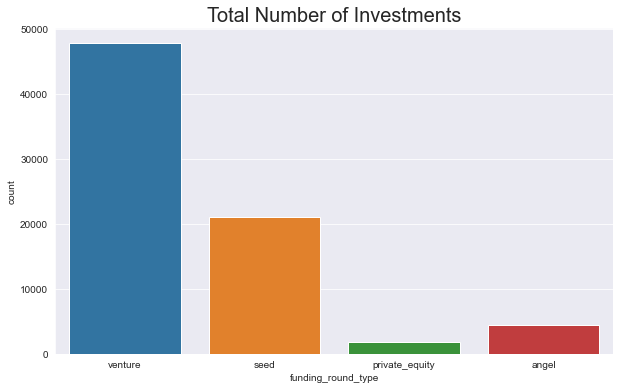

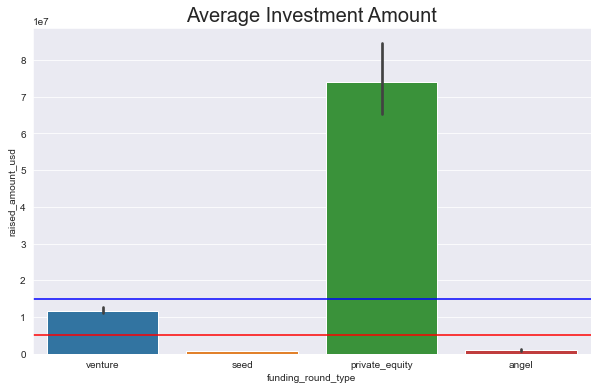

In [87]:
#plot showing the fraction of Total/Average investments (globally) in angel, venture, seed, and private equity.

#Total Number of Investments
plt.figure(figsize=(10,6))
plot1=sns.countplot(x="funding_round_type", data=master_frame)
plt.title("Total Number of Investments",fontsize=20)
plt.show()



#Average Investment Amount
plt.figure(figsize=(10,6))
plot2=sns.barplot(x="funding_round_type",y="raised_amount_usd", data=master_frame,estimator=np.mean)
plt.axhline(y=5000000,color = 'red')
plt.axhline(y=15000000,color = 'blue')
plt.title("Average Investment Amount",fontsize=20)
plt.show()

### It is clear from Average Investment Amount plot that Venture funding type is most suitable as it is with the range 5-15 M USD

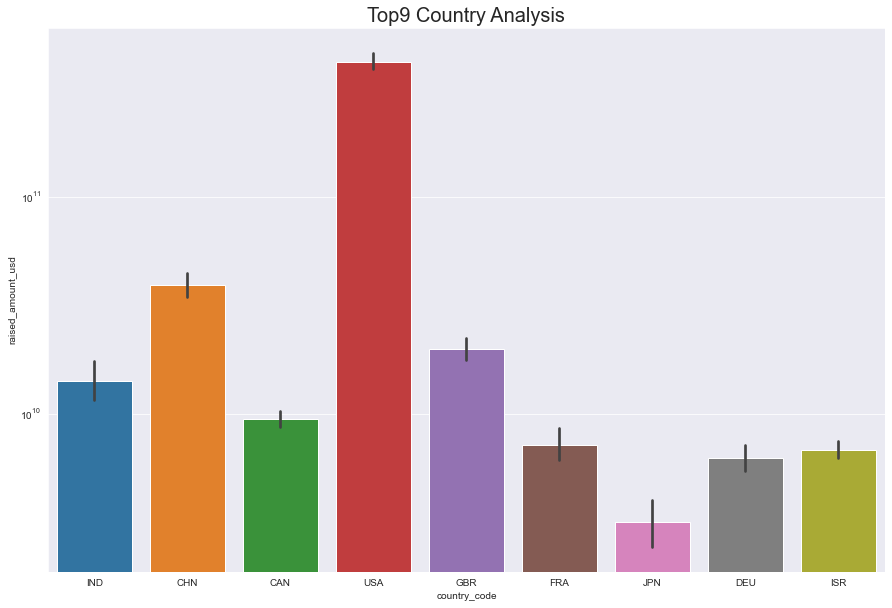

In [88]:
#plot showing the top 9 countries against the total amount of investments of funding type Venture(top DF consists of only Venture as funding type)
plt.figure(figsize=(15,10))
plot3=sns.barplot(x='country_code', y='raised_amount_usd' ,data=top9, estimator=sum)
plot3.set_yscale('log')
plt.title("Top9 Country Analysis",fontsize=20)
plt.show()

### Creating DF top3 to store data for Top 3 sectors for the Top 3 countries(USA,GBR,IND)

In [89]:
top3=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [90]:
top3=top3.append((D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]),ignore_index=True)

In [91]:
top3=top3.append((D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]),ignore_index=True)

In [92]:
top3.shape

(8646, 19)

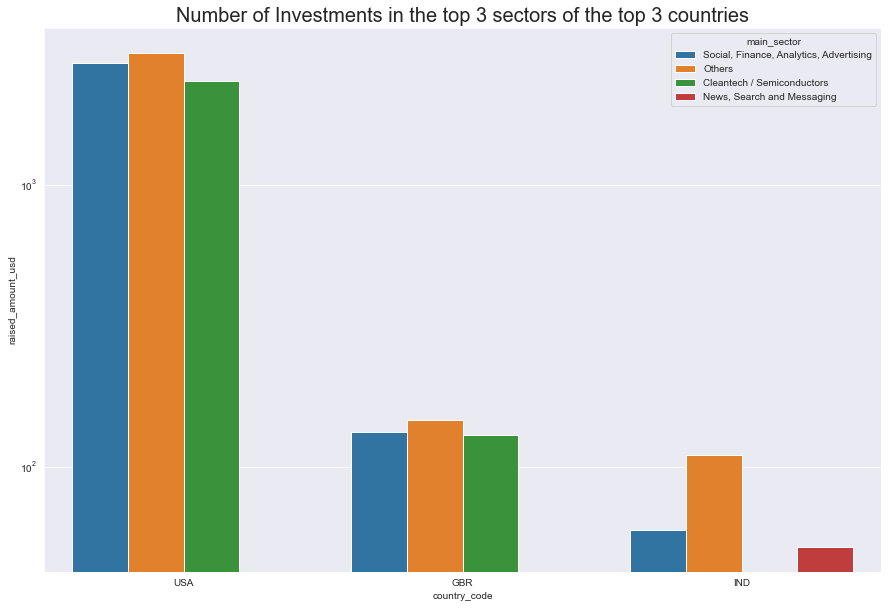

In [93]:
#plot showing the number of investments in the top 3 sectors of the top 3 countries for funding type Venture
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
plot4=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=top3,estimator=len)
plot4.set_yscale('log')
plt.title("Number of Investments in the top 3 sectors of the top 3 countries",fontsize=20)
plt.show()

### **--------------------------------------------------END--------------------------------------------------**